In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
file_path = r"C:\EDA PROJECT DATA SCIENCE\dataset\bigmart.csv"

In [3]:
df = pd.read_csv(file_path)

# STEP 1 :- DATA UNDERSTANDING

In [5]:
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [6]:
df.shape

(8523, 12)

In [7]:
df.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales'],
      dtype='object')

In [8]:
df.dtypes

Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
Item_Outlet_Sales            float64
dtype: object

In [9]:
df.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

Therefore, We can interpret from this that only the columns containing the item_weight and outlet_size have null values.

# STEP 2 :- DATA CLEANING

Handling Missing Values

In [13]:
# First handling the Item_Weight column
# Missing values are filled using the median instead of the mean
# This is because grocery item weights can have extreme values
# which can easily affect the mean
# The median is more robust to outliers and gives a more realistic value

In [14]:
df['Item_Weight'] = df['Item_Weight'].fillna(df['Item_Weight'].median())

In [15]:
# Handling missing values in Outlet_Size
# Since Outlet_Size is a categorical column, missing values are filled using mode
# Mode is chosen because it represents the most common outlet size
# The mode is calculated based on Outlet_Type to keep the values realistic

In [16]:
df['Outlet_Size'] = df.groupby('Outlet_Type')['Outlet_Size'].transform(lambda x: x.fillna(x.mode()[0]))

# STEP 3 :-  UNIVARIATE ANALYSIS

Item_Outlet_Sales column

In [19]:
df['Item_Outlet_Sales'].describe()

count     8523.000000
mean      2181.288914
std       1706.499616
min         33.290000
25%        834.247400
50%       1794.331000
75%       3101.296400
max      13086.964800
Name: Item_Outlet_Sales, dtype: float64

<Axes: xlabel='Item_Outlet_Sales', ylabel='Count'>

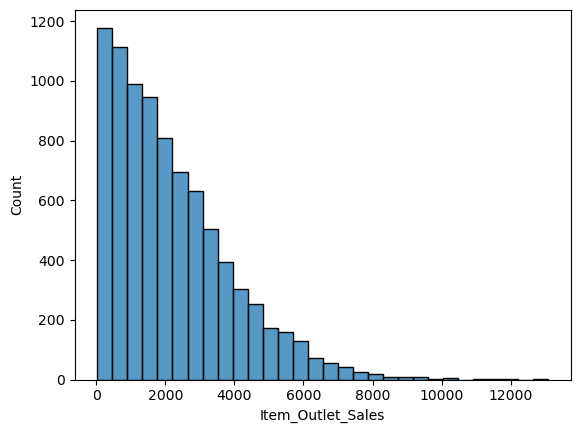

In [20]:
sns.histplot(df['Item_Outlet_Sales'], bins=30)

<Axes: xlabel='Item_Outlet_Sales'>

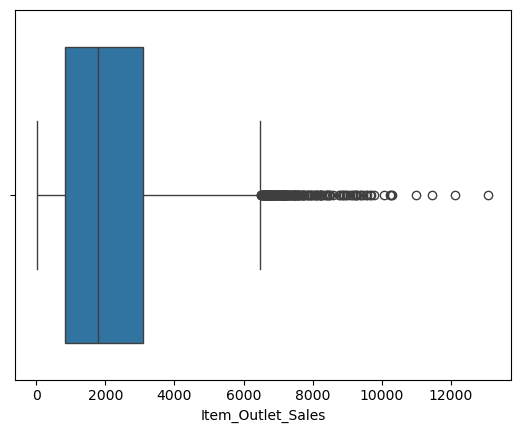

In [21]:
sns.boxplot(x=df['Item_Outlet_Sales'])

In [22]:
# sales are right skewed, indicating the data is placed towards the positive direction.
# there are a small number of high performing items.
# This indicates the 80/20 rule, where 80% of the sales are generated by low and moderate value items and 20% of the sales by high value items.

ITEM_MRP COLUMN

In [24]:
df['Item_MRP'].describe()

count    8523.000000
mean      140.992782
std        62.275067
min        31.290000
25%        93.826500
50%       143.012800
75%       185.643700
max       266.888400
Name: Item_MRP, dtype: float64

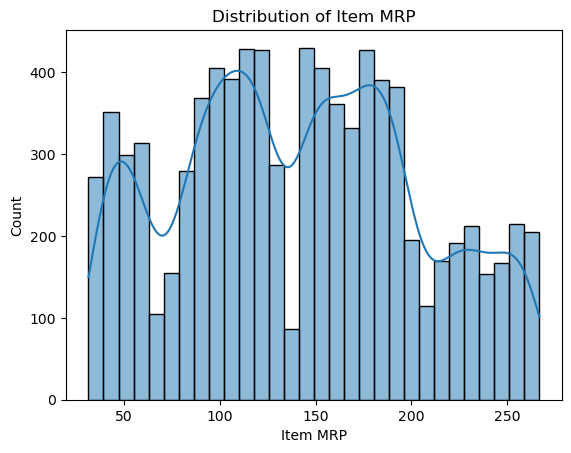

In [25]:
sns.histplot(df['Item_MRP'], bins=30, kde=True)
plt.title('Distribution of Item MRP')
plt.xlabel('Item MRP')
plt.ylabel('Count')
plt.show()

<Axes: xlabel='Item_MRP'>

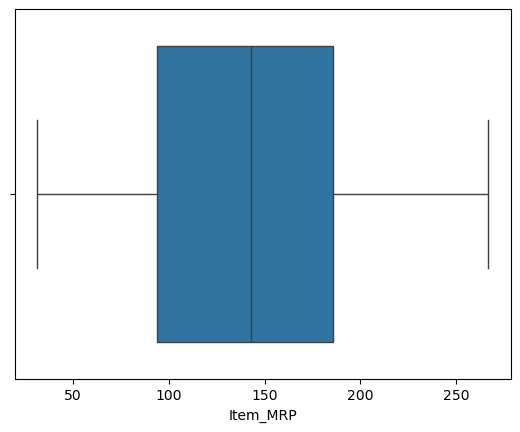

In [26]:
sns.boxplot(x=df['Item_MRP'])

In [27]:
# since, there are many peaks in this plot, we can safely say it is a multimodal pattern ( multiple modes ) .
# data is clustered due to the presence of multiple peaks.
# In MRP, there are price bands.

ITEM_WEIGHT_COLUMN

In [29]:
df['Item_Weight'].describe()

count    8523.00000
mean       12.81342
std         4.22724
min         4.55500
25%         9.31000
50%        12.60000
75%        16.00000
max        21.35000
Name: Item_Weight, dtype: float64

<Axes: xlabel='Item_Weight', ylabel='Count'>

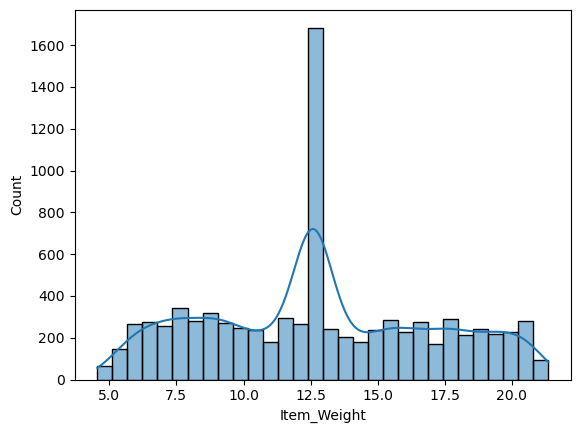

In [30]:
sns.histplot(df['Item_Weight'],bins =30, kde = True)

In [31]:
# Most item weights are concentrated around a mid-range, with fewer very light or very heavy items. 
# The central peak is expected since missing values were filled using median imputation.
# Mean, median, and mode are not exactly equal, which is expected in real-world data

ITEM_TYPE COLUMN

In [33]:
df['Item_Type'].value_counts()

Item_Type
Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Breads                    251
Hard Drinks               214
Others                    169
Starchy Foods             148
Breakfast                 110
Seafood                    64
Name: count, dtype: int64

<Axes: xlabel='count', ylabel='Item_Type'>

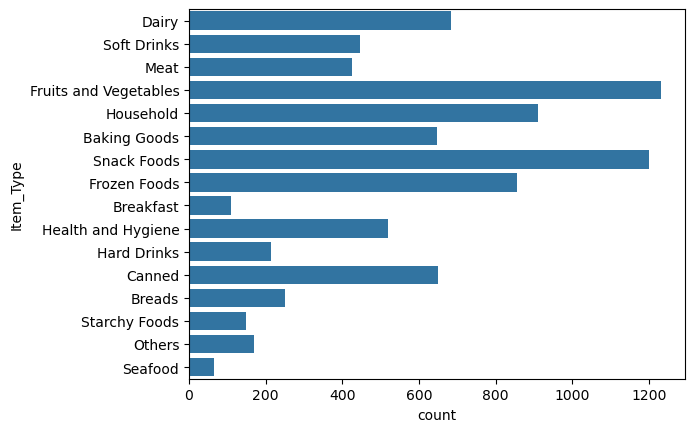

In [34]:
sns.countplot(y='Item_Type', data=df)

In [35]:
# Since this is a categorical column, I counted the number of items in each category
# and used a countplot to visualize how frequently each item type appears in the dataset.

OUTLET_TYPE COLUMN

In [37]:
df['Outlet_Type'].value_counts()

Outlet_Type
Supermarket Type1    5577
Grocery Store        1083
Supermarket Type3     935
Supermarket Type2     928
Name: count, dtype: int64

<Axes: xlabel='count', ylabel='Outlet_Type'>

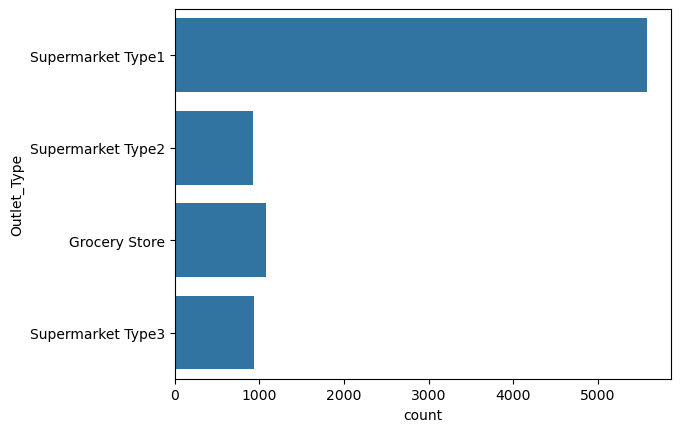

In [38]:
sns.countplot(y='Outlet_Type', data=df)

In [39]:
# Outlet_Type is a categorical variable, so a countplot is used to visualize
# how frequently each outlet type appears in the dataset

OUTLET_SIZE COLUMN

In [41]:
df['Outlet_Size'].value_counts()

Outlet_Size
Small     4798
Medium    2793
High       932
Name: count, dtype: int64

<Axes: xlabel='count', ylabel='Outlet_Size'>

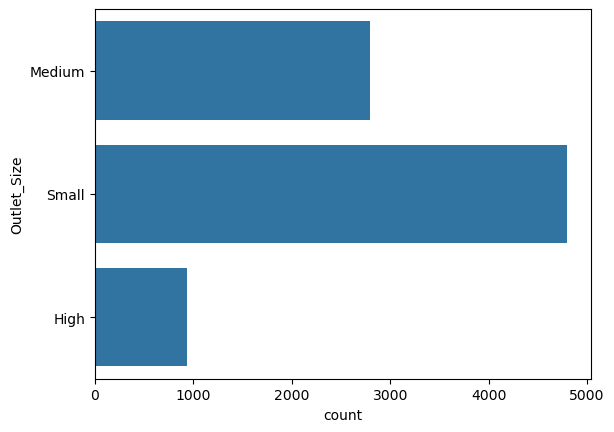

In [42]:
sns.countplot(y='Outlet_Size', data=df)

In [43]:
# this indicates, that small outlets appear the most in the dataset.
# and large outlets appear less because of their scarcity.

OUTLET_LOCATION_TYPE COLUMN

In [45]:
df['Outlet_Location_Type'].value_counts()

Outlet_Location_Type
Tier 3    3350
Tier 2    2785
Tier 1    2388
Name: count, dtype: int64

<Axes: xlabel='count', ylabel='Outlet_Location_Type'>

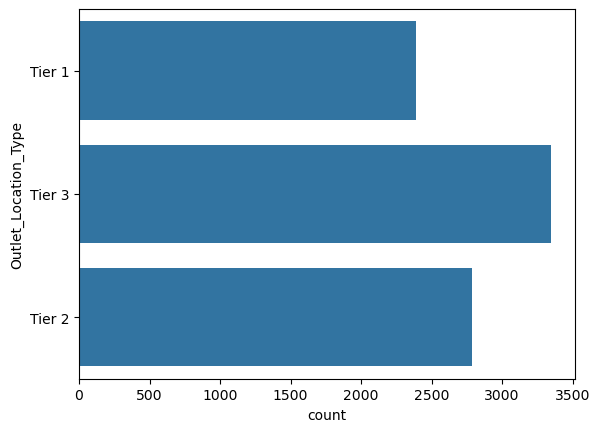

In [46]:
sns.countplot(y='Outlet_Location_Type', data=df)

In [47]:
# this does not indicate the performance of the outlets of tier 1,2,3 cities.
# instead this indicates that the number of outlet records in this dataset are more for tier 3 cities than 1,2.
# since the number of tier 3 and tier 2 cities is significantly more than tier 1 cities, naturally the frequency of tier 3 cities will be higher.

# STEP 4 : BIVARIATE ANALYSIS
In this step, we analyze how different independent variables relate to Item_Outlet_Sales.
 This helps understand which factors may influence sales across items and outlets.


Item_MRP vs Outlet_Sales

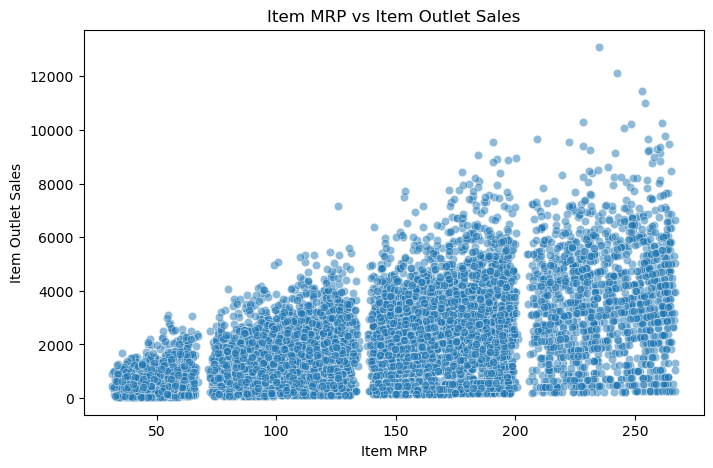

In [50]:
plt.figure(figsize=(8,5))
sns.scatterplot(x='Item_MRP', y='Item_Outlet_Sales', data=df,alpha=0.5)
plt.title('Item MRP vs Item Outlet Sales')
plt.xlabel('Item MRP')
plt.ylabel('Item Outlet Sales')
plt.show()

In [51]:
# The plot shows an upward trend: higher MRP items generally have higher sales potential.
# The sales values are pretty scattered for the same MRP, so price alone doesn't decide the sales.
# In general, higher MRP items can give higher sales,
# but the pattern is not perfectly linear and depends on other things as well.

item_weight vs item_sales

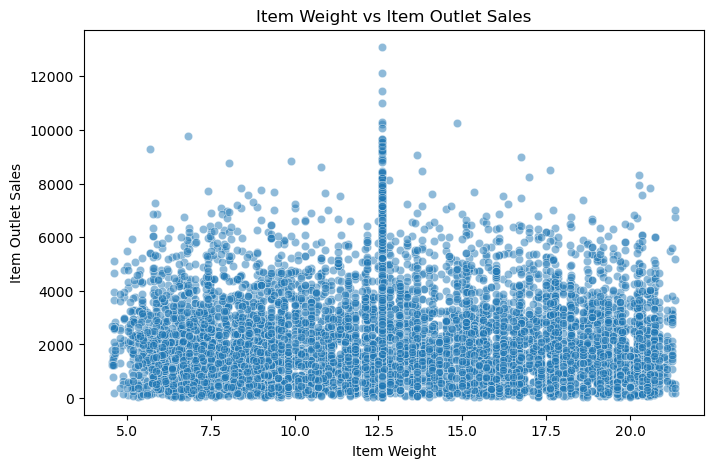

In [53]:
plt.figure(figsize=(8,5))
sns.scatterplot(x='Item_Weight', y='Item_Outlet_Sales', data=df, alpha=0.5)
plt.title('Item Weight vs Item Outlet Sales')
plt.xlabel('Item Weight')
plt.ylabel('Item Outlet Sales')
plt.show()

In [54]:
# Since missing Item_Weight values were filled using a median based technique,
# we see a higher concentration of points around the median weight.
# However, sales values are highly scattered across all weights, showing no strong relationship.

Outlet_type v/s Item_outlet_sales

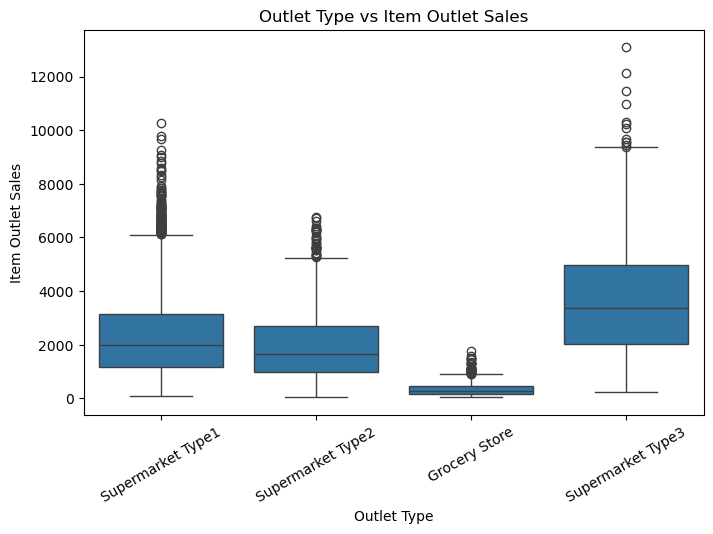

In [56]:
plt.figure(figsize=(8,5))
sns.boxplot(x='Outlet_Type', y='Item_Outlet_Sales', data=df)
plt.title('Outlet Type vs Item Outlet Sales')
plt.xlabel('Outlet Type')
plt.ylabel('Item Outlet Sales')
plt.xticks(rotation=30)
plt.show()

In [57]:
# We used a boxplot because it helps compare the distribution of sales across outlet types.
# It clearly shows the median, IQR (middle 50%), spread, and outliers for each outlet category.
# Grocery Stores have the lowest median sales, indicating comparatively lower revenue generation.
# Supermarket Type3 has the highest median sales and also shows higher variation, meaning some items generate very high sales.
# Supermarket Type1 and Type2 fall in the mid-range, with Type1 slightly higher than Type2 in terms of sales.

Outlet_size v/s Item_outlet_sales

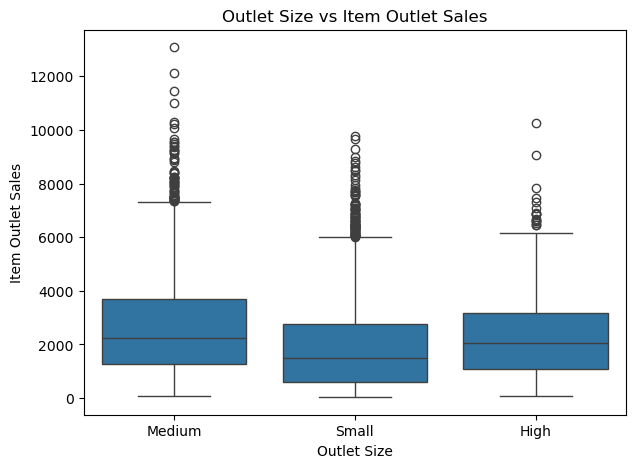

In [59]:
plt.figure(figsize=(7,5))
sns.boxplot(x='Outlet_Size', y='Item_Outlet_Sales', data=df)
plt.title('Outlet Size vs Item Outlet Sales')
plt.xlabel('Outlet Size')
plt.ylabel('Item Outlet Sales')
plt.show()

In [60]:
# The distribution of sales varies across different outlet sizes.
# Medium-sized outlets show the highest median sales compared to small and high outlets.
# Small outlets have the lowest median sales, indicating lower sales overall.
# Medium outlets also show more high-sales outliers, meaning some items perform extremely well in medium-sized outlets.
# This shows outlet size is associated with sales, although other factors may also affect sales.

In [61]:
# Note: High-sized outlets are also less frequent in the dataset (as seen in univariate analysis),
# which may reduce their overall representation.

outlet_location v/s item_outlet_sales

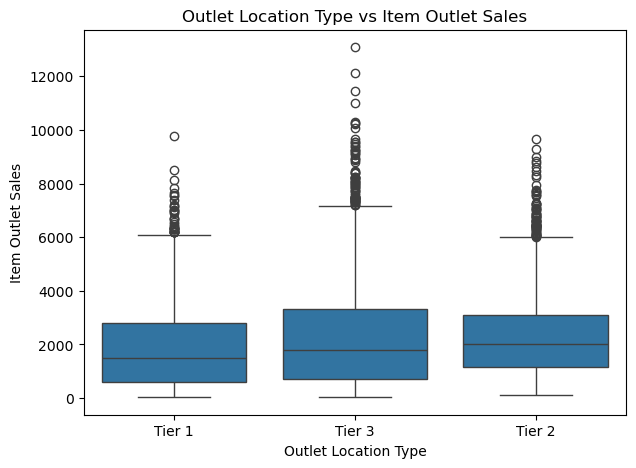

In [63]:
plt.figure(figsize=(7,5))
sns.boxplot(x='Outlet_Location_Type', y='Item_Outlet_Sales', data=df)
plt.title('Outlet Location Type vs Item Outlet Sales')
plt.xlabel('Outlet Location Type')
plt.ylabel('Item Outlet Sales')
plt.show()

In [64]:
# The distribution of Item_Outlet_Sales varies across different outlet location tiers.
# Tier 2 outlets show the highest median sales compared to Tier 1 and Tier 3.
# Tier 1 has the lowest median sales, indicating comparatively lower sales overall.
# Tier 3 shows several high-sales outliers, meaning some items/outlets in Tier 3 generate very high sales.
# There is significant variation, so Outlet_Location_Type alone cannot explain sales completely

Item_type v/s Outlet_item_sales

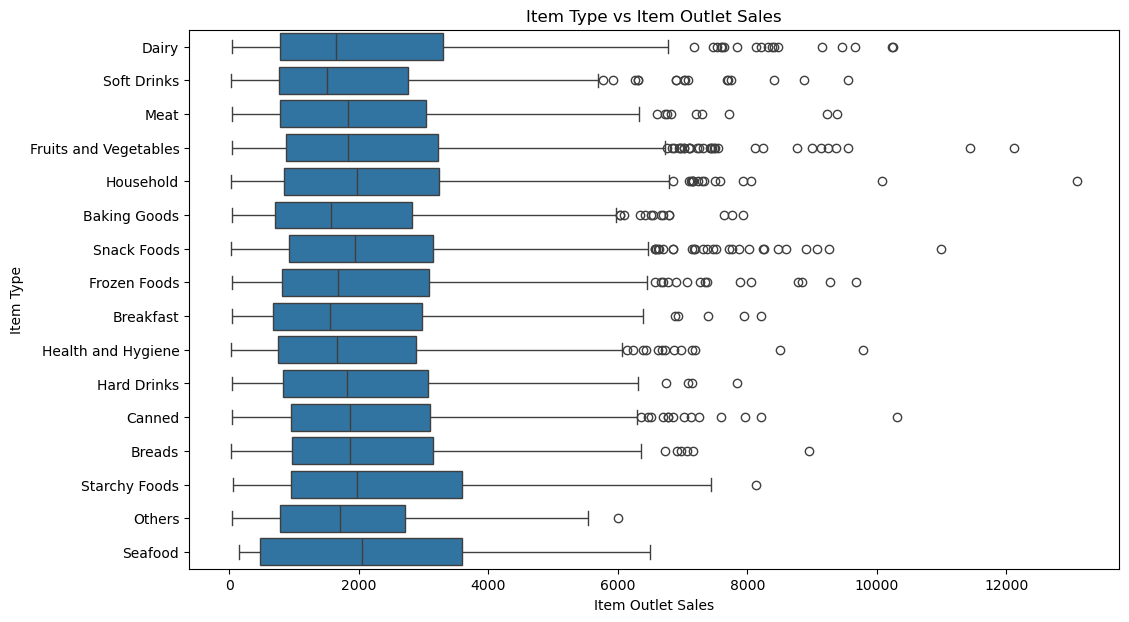

In [66]:
plt.figure(figsize=(12,7))
sns.boxplot(y='Item_Type', x='Item_Outlet_Sales', data=df)
plt.title('Item Type vs Item Outlet Sales')
plt.xlabel('Item Outlet Sales')
plt.ylabel('Item Type')
plt.show()

In [67]:
# The boxplot shows that Item_Outlet_Sales varies across different Item_Type categories.
# Some item categories have higher median sales compared to others, indicating differences in demand/revenue.
# Many categories also show high-sales outliers, meaning certain item–outlet combinations generate very high sales.
# Overall, Item_Type appears to be associated with sales, but there is still a lot of variation in each of the categories.

# STEP 5 : MULTIVARIATE ANALYSIS
In this section, we perform multivariate analysis to study sales using more than two variables at the same time.
 This helps us understand how different outlet and item features together relate to Item_Outlet_Sales

Since, We could not see any single variable which completely associated with the item_outlet_sales, we will try to perform multivariate analysis..

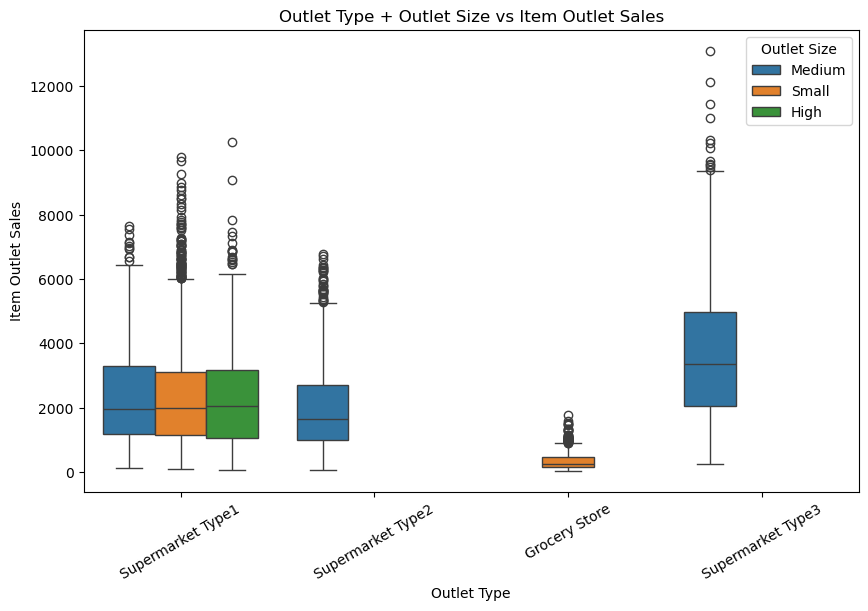

In [69]:
plt.figure(figsize=(10,6))
sns.boxplot(x='Outlet_Type', y='Item_Outlet_Sales', hue='Outlet_Size', data=df)
plt.title('Outlet Type + Outlet Size vs Item Outlet Sales')
plt.xlabel('Outlet Type')
plt.ylabel('Item Outlet Sales')
plt.xticks(rotation=30)
plt.legend(title='Outlet Size')
plt.show()

In [70]:
# Supermarket Type3 + Medium size has the highest median sales.
# Grocery Store outlets are only small and they have the lowest sales distribution.
# In Supermarket Type1, sales are relatively similar across small/medium/high sizes (medians not extremely different),
# but medium seems slightly better.
# extra :- Supermarket Type1 is present across all outlet sizes, showing that it has a wide representation in the dataset.

In [71]:
# Supermarket Type3 has the highest median sales and also shows many high-sales outliers,
# which indicates better overall sales performance compared to other outlet types.

Outlet_Location_Type + Outlet_Type vs Item_Outlet_Sales

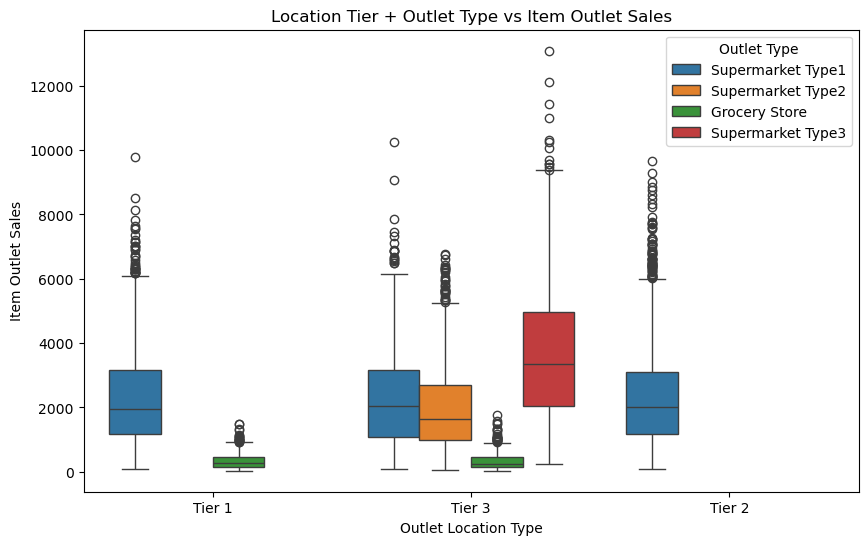

In [77]:
plt.figure(figsize=(10,6))
sns.boxplot(x='Outlet_Location_Type', y='Item_Outlet_Sales', hue='Outlet_Type',data = df)
plt.title('Location Tier + Outlet Type vs Item Outlet Sales')
plt.xlabel('Outlet Location Type')
plt.ylabel('Item Outlet Sales')
plt.legend(title='Outlet Type')
plt.show()

In [79]:
# Supermarket Type3 in Tier 3 shows the highest median sales and many high-sales outliers.
# Grocery Stores have consistently low median sales across all location tiers.

In [81]:
# From the plot, the difference in sales between outlet types is much larger than the difference between location tiers.
# For example, grocery stores show low sales in all tiers, while supermarkets show much higher sales.
# This suggests outlet type plays a bigger role in sales patterns than location tier alone.

CORRELATION HEATMAP ( NUMERIC DATA ONLY ) 

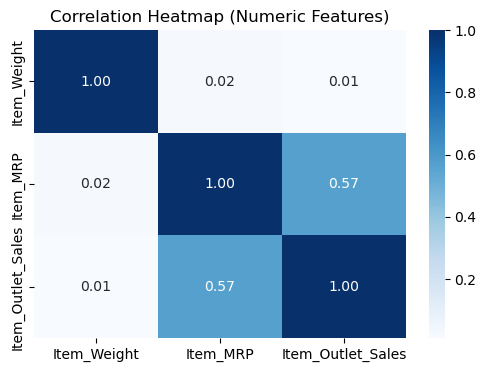

In [86]:
import matplotlib.pyplot as plt
import seaborn as sns

# selecting only numeric columns for correlation
numeric_df = df[['Item_Weight', 'Item_MRP', 'Item_Outlet_Sales']]

# correlation matrix
corr = numeric_df.corr()

# heatmap plot
plt.figure(figsize=(6,4))
sns.heatmap(corr, annot=True, fmt=".2f", cmap="Blues")
plt.title("Correlation Heatmap (Numeric Features)")
plt.show()


In [92]:
# Item_MRP usually has a stronger positive correlation with sales compared to Item_Weight.
# Item_Weight shows weak correlation with sales, meaning weight alone does not explain sales much.
# meaning higher priced items generally tend to generate higher sales.
# Item_Weight has near-zero correlation with Item_Outlet_Sales (0.01), so weight does not strongly relate to sales.
# Item_Weight and Item_MRP also show almost no correlation, suggesting pricing is not dependent on weight alone.

# FINAL CONCLUSION / SUMMARY 

# STEP 6 : KEY INSIGHTS / CONCLUSION

After performing data cleaning, univariate, bivariate, and multivariate analysis, the following insights were observed:

1. Item_Outlet_Sales is highly right-skewed, meaning most items generate low-to-moderate sales, while only a few items generate very high sales.

2. Item_MRP shows a multimodal distribution, which indicates that products are priced in specific price bands rather than being uniformly distributed.

3. Item_MRP has a clear positive association with sales. Higher MRP items generally show higher sales potential, although the relationship is not perfectly linear.

4. Item_Weight does not show a strong relationship with Item_Outlet_Sales. The sales values are highly scattered across weights, which means weight alone is not a strong factor for predicting sales.

5. Outlet_Type plays a major role in sales distribution. Grocery Stores have the lowest median sales, while Supermarket Type3 shows the highest median sales and several high-sales outliers.

6. Outlet_Size also impacts sales. Medium-sized outlets show the highest median sales compared to small and high outlets, while small outlets show the lowest sales.

7. Outlet_Location_Type shows variations in sales as well. Tier 2 outlets show higher median sales compared to Tier 1 and Tier 3, while Tier 3 contains some extreme high-sales outliers.

8. Item_Type categories have different sales distributions, which suggests that demand/revenue varies by product category. Several categories also contain high-sales outliers.

9. Multivariate analysis showed that Supermarket Type3 (mostly in Tier 3) performs best in terms of median sales, while Grocery stores remain low-performing across tiers.

10. Correlation heatmap confirms that Item_MRP has the strongest correlation with sales (0.57), while Item_Weight has near-zero correlation with sales.
